Name: Ibrahim Al Hazwani

In [18]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import cluster

In [2]:
#load the dataset
face_df = pd.read_csv('../Data/face.csv')

In [8]:
face_df

,Unnamed: 0,V1,V2
0,1,1.452947,2.022211
1,2,-1.028710,1.080551
2,3,-1.048832,1.221872
3,4,0.645529,0.377475
4,5,2.429847,6.115789
...,...,...,...
595,596,-2.378359,16.965478
596,597,-4.500000,25.000000
597,598,4.500000,25.000000
598,599,0.000000,32.000000


In [9]:
#removed the first column since I have to work with the last two
new_face_df = face_df.drop(['Unnamed: 0'],1)

In [10]:
new_face_df

,V1,V2
0,1.452947,2.022211
1,-1.028710,1.080551
2,-1.048832,1.221872
3,0.645529,0.377475
4,2.429847,6.115789
...,...,...
595,-2.378359,16.965478
596,-4.500000,25.000000
597,4.500000,25.000000
598,0.000000,32.000000


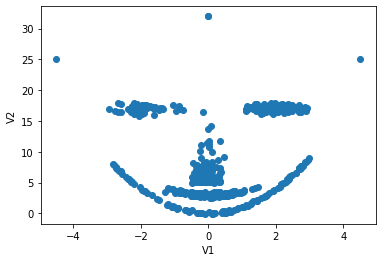

In [27]:
#plot the dataset
plt.scatter(face_df['V1'],face_df['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [25]:
#elbow method for choosing the number of cluster
distance = []
for i in range(1,10):
    km = cluster.KMeans(n_clusters=i, init="k-means++")
    km.fit(new_face_df)
    distance.append(km.inertia_)

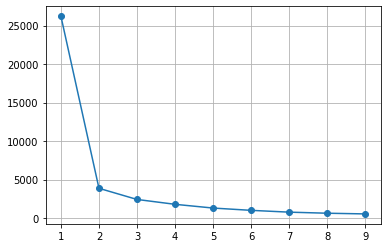

In [48]:
#plotting the number of cluster
plt.plot(range(1,10),distance, '-o')
plt.grid()
plt.show()

I'm going to choose 3 as number of cluster.

In [55]:
km = cluster.KMeans(n_clusters = 3, init="k-means++")
new_face_c = km.fit_predict(new_face_df.iloc[:,[0,1]])

In [56]:
print(km.labels_)
print(km.cluster_centers_)
print(km.inertia_)
print(new_face_c)

[0 0 0 0 2 0 0 0 2 2 0 0 2 2 2 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 2 0 2
 0 2 0 0 2 0 2 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 2 2 0 0
 0 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 2 2 2 2 2
 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

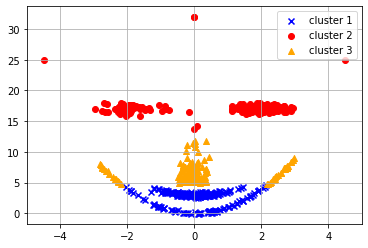

In [57]:
#plotting the 3 cluster
plt.scatter(new_face_df.iloc[new_face_c == 0, 0], new_face_df.iloc[new_face_c == 0,1], c='b', marker= 'x', label = 'cluster 1')
plt.scatter(new_face_df.iloc[new_face_c == 1, 0], new_face_df.iloc[new_face_c == 1,1], c='r', marker= 'o', label = 'cluster 2')
plt.scatter(new_face_df.iloc[new_face_c == 2, 0], new_face_df.iloc[new_face_c == 2,1], c='orange', marker= '^', label = 'cluster 3')
plt.legend()
plt.grid()
plt.show()